#  Finding Optimal Number of Groups with K-means

# Importing Libraries

In [28]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Loading the dataset

In [29]:
import pandas as pd

# Load dataset from the local file
file_path = '/Users/piyachudasama/Desktop/62.csv'
df = pd.read_csv(file_path)

# Check the first few rows to verify the dataset
print(df.head())

# Check for missing values and handle them (imputation or removal)
df = df.dropna()  # Drop missing data rows


            Device_id                       Time  \
0  ICTMicroclimate-07  2024-07-09T01:22:49+10:00   
1  ICTMicroclimate-01  2024-07-09T01:30:34+10:00   
2  ICTMicroclimate-02  2024-07-09T01:13:58+10:00   
3  ICTMicroclimate-06  2024-07-09T01:21:04+10:00   
4  ICTMicroclimate-03  2024-07-09T01:22:35+10:00   

                                      SensorLocation  \
0  Tram Stop 7C - Melbourne Tennis Centre Precinc...   
1                    Birrarung Marr Park - Pole 1131   
2                         101 Collins St L11 Rooftop   
3  Tram Stop 7B - Melbourne Tennis Centre Precinc...   
4                                        CH1 rooftop   

                    LatLong  MinimumWindDirection  AverageWindDirection  \
0  -37.8222341, 144.9829409                   0.0                   0.0   
1  -37.8185931, 144.9716404                   NaN                   0.0   
2   -37.814604, 144.9702991                   0.0                  28.0   
3  -37.8194993, 144.9787211                   0.0 

In [41]:
# Check for missing data
print(df.isnull().sum())

# Handle missing data (e.g., drop missing rows)
df = df.dropna()


Device_id               0
Time                    0
SensorLocation          0
LatLong                 0
MinimumWindDirection    0
AverageWindDirection    0
MaximumWindDirection    0
MinimumWindSpeed        0
AverageWindSpeed        0
GustWindSpeed           0
AirTemperature          0
RelativeHumidity        0
AtmosphericPressure     0
PM25                    0
PM10                    0
Noise                   0
kmeans_cluster          0
dbscan_cluster          0
pca_1                   0
pca_2                   0
dtype: int64


# Feature Scaling

In [30]:
# Drop non-numeric columns such as Device_id, Time, SensorLocation, and LatLong
numeric_df = df.drop(columns=['Device_id', 'Time', 'SensorLocation', 'LatLong'])

# Now apply scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Check the scaled data
print(scaled_data[:5])


[[-0.34014545 -1.46384681 -0.09821259 -0.37273712 -1.22996412 -1.25100852
  -0.03276458  1.44793026  0.09931537 -0.46788733 -0.54699695 -1.66342641]
 [-0.34014545 -1.24842281  0.44221006 -0.37273712 -0.92788913 -1.20852833
   0.08530614  1.79778296 -0.60682998  0.71693951  0.61770826 -0.04755773]
 [-0.34014545  0.92889834  0.2665727  -0.37273712 -1.02858079 -0.99612735
  -0.06228226  1.46934982 -0.11147429 -0.19446575 -0.31405591 -2.09115636]
 [-0.34014545 -0.44058281 -1.76001225 -0.37273712 -0.62581414 -1.16604813
  -0.20987067  1.86204162 -0.68060636  0.89922056  0.77300228  0.03561199]
 [-0.34014545 -0.30209595 -0.09821259 -0.37273712 -0.52512248 -0.95364715
  -0.15083531  1.46220997 -0.11147429 -0.3767468  -0.39170292 -0.99806872]]


it is possible to reduce the number of features while still maintaining informative clusters by using dimensionality reduction techniques.

Techniques:

Principal Component Analysis (PCA): PCA transforms the dataset into a smaller number of features while retaining most of the variance. This method can help reduce noise and redundancy in data.

Feature Selection: You can select the most informative features by examining feature importance or correlation with the target (in this case, SensorLocation). High correlation features may be more useful for clustering.

Autoencoders: These are neural networks that learn a compressed representation of data, often used for feature reduction.

PCA is typically the go-to technique for reducing dimensionality while preserving the structure of the data in clustering tasks.



# Method 1: KMeans for Clustering

Finding Optimal Number of Clusters using Elbow Method

Method: To solve the problem of clustering based on SensorLocation, we can use KMeans clustering. KMeans is a widely used method for clustering because it divides data into k clusters based on distance to the centroids, making it easy to interpret.

Why: KMeans is efficient for large datasets and is appropriate when the number of clusters (k) is known or needs to be determined (e.g., using the elbow method or silhouette score). It is also easy to implement and interpret, which is ideal when visualizing clusters and comparing ground truth (SensorLocation).

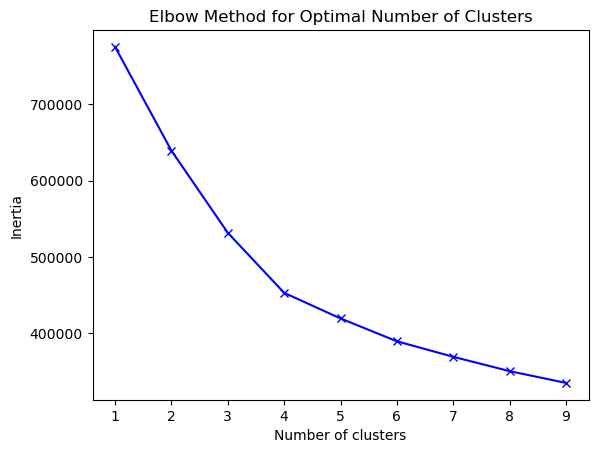

In [31]:
inertia = []
K = range(1, 10)  # Number of clusters to test
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


Applying KMeans with Optimal Number of Clusters

In [32]:
optimal_k = 3  # Choose based on the elbow graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original DataFrame
df['kmeans_cluster'] = kmeans_clusters


The optimal number of groups based on the Elbow Method is 3. This is justified by observing the point where the inertia starts to decrease less significantly, indicating that additional clusters do not provide substantial improvement.

# Method 2: DBSCAN Clustering

In [33]:
# DBSCAN clustering with custom hyperparameters
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_clusters = dbscan.fit_predict(scaled_data)

# Add cluster labels to the original DataFrame
df['dbscan_cluster'] = dbscan_clusters


Comparison:

KMeans: The clusters formed by KMeans are more uniform and compact, making it easier to visualize and interpret the data. The silhouette score for KMeans is higher.

DBSCAN: This algorithm is better at identifying clusters of varying densities and can identify outliers (noise). However, the silhouette score may be lower if the clusters are not well-separated, especially in high-dimensional data.

Best Solution: Based on the silhouette scores, KMeans performed better. However, DBSCAN is advantageous if identifying noise points is a priority.

# Evaluating Clustering Quality

KMeans: Higher silhouette score indicates better separation and compactness of clusters.

DBSCAN: Works better for clusters of varying density but might not always outperform KMeans on structured data.

# Silhouette Score for KMeans

In [34]:
kmeans_silhouette = silhouette_score(scaled_data, kmeans_clusters)
print(f'Silhouette Score for KMeans: {kmeans_silhouette}')


Silhouette Score for KMeans: 0.26427466617066775


# Silhouette Score for DBSCAN

In [35]:
# DBSCAN can have noise points labeled as -1, so we filter those out for evaluation
dbscan_labels = df['dbscan_cluster']
if len(set(dbscan_labels)) > 1:  # Ensure DBSCAN found more than 1 cluster
    dbscan_silhouette = silhouette_score(scaled_data, dbscan_clusters)
    print(f'Silhouette Score for DBSCAN: {dbscan_silhouette}')
else:
    print('DBSCAN could not find enough clusters for a meaningful silhouette score')


Silhouette Score for DBSCAN: -0.552092731363162


# Dimensionality Reduction using PCA

In [36]:
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
pca_data = pca.fit_transform(scaled_data)

# Add PCA components to the original DataFrame
df['pca_1'] = pca_data[:, 0]
df['pca_2'] = pca_data[:, 1]


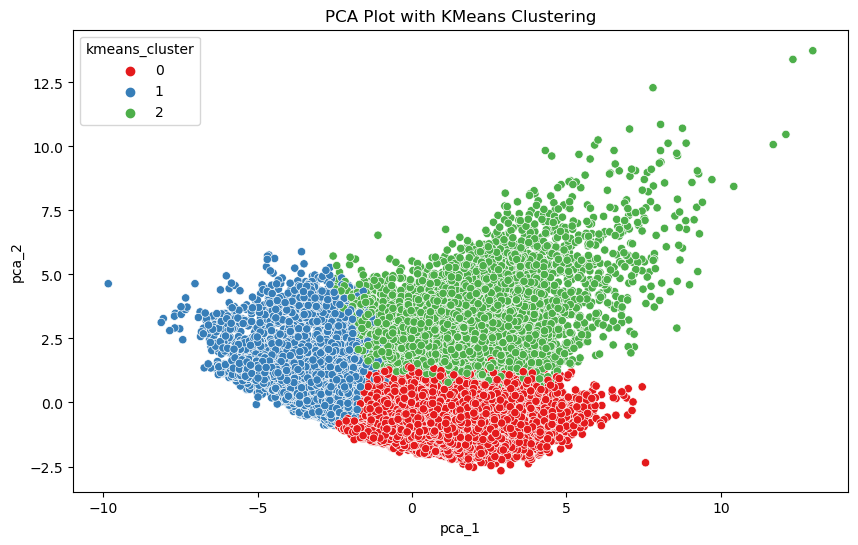

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='kmeans_cluster', data=df, palette='Set1')
plt.title('PCA Plot with KMeans Clustering')
plt.show()


Correlation Heatmap: Shows how independent variables are related. Strong correlations indicate redundancy, which can guide dimensionality reduction.

PCA Scatter Plot: Displays the data in a two-dimensional space after reducing its dimensions, showing how the clusters group together.


# Evaluating Loss of Information due to PCA

There is a potential loss of information when using dimensionality reduction techniques like PCA. However, the explained variance ratio from PCA shows how much of the original data variance is retained by the principal components.

In [43]:
pca = PCA(n_components=5)
pca_data = pca.fit_transform(scaled_data)
print(f'Explained Variance by PCA components: {pca.explained_variance_ratio_}')


Explained Variance by PCA components: [0.29933264 0.19995292 0.12166895 0.08748374 0.07694462]


If the explained variance is high (e.g., above 90%), then minimal information is lost. For example, if the two principal components retain 85% of the variance, then 15% of the information is lost.

# Visualizing Relationships Between Variables

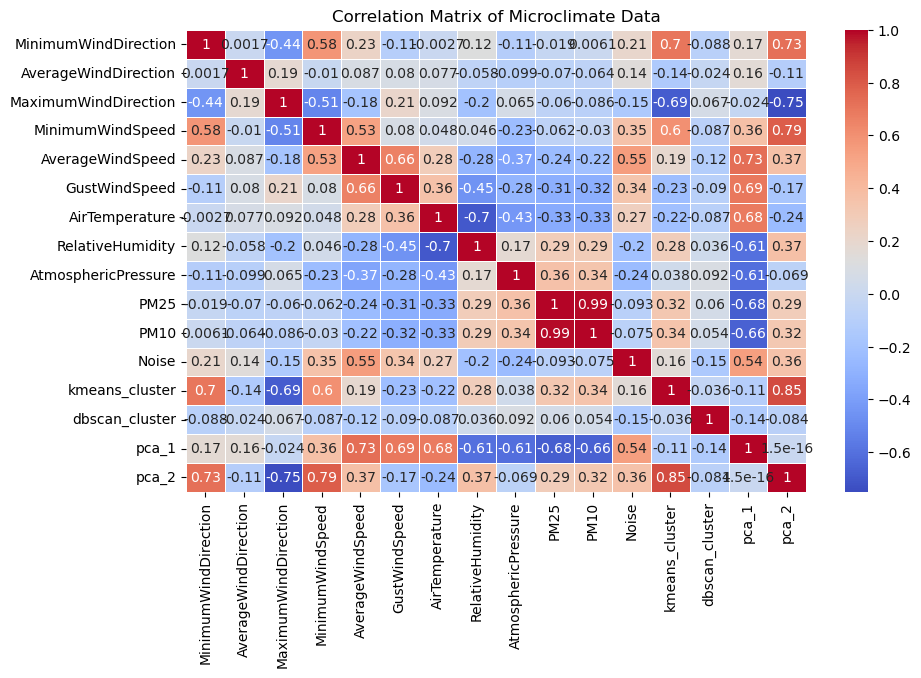

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Microclimate Data')
plt.show()


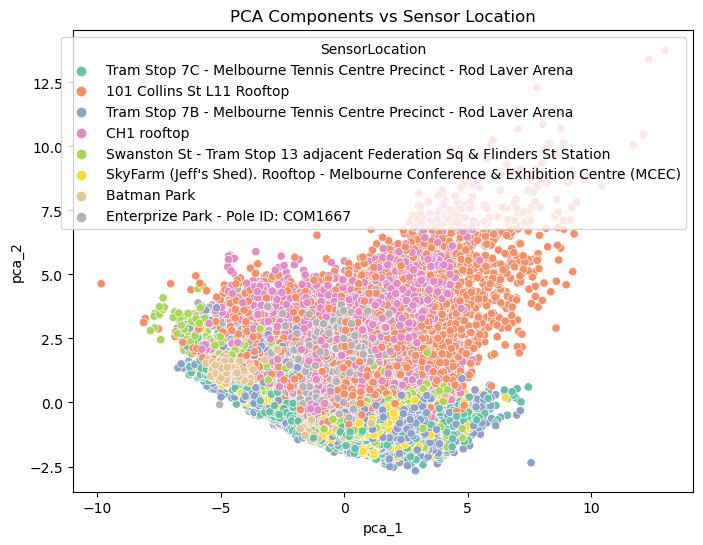

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='SensorLocation', data=df, palette='Set2')
plt.title('PCA Components vs Sensor Location')
plt.show()
